<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.unionjalisco.mx/sites/default/files/styles/galeria/public/field/image/iteso_3_1.jpg?itok=M6pp1pEQ" width=200"px" height="100px" />

# PROYECTO TEMA 2


- Integrante 1: Castillo Fuhr Araceli Soledad

- Integrante 2: Ramírez Hinojosa Diana Laura


<img style="float: RIGHT; margin: 0px 0px 15px 15px;" src="https://profesionaljdeabajo.files.wordpress.com/2013/08/clima.png" width=400"px" height="200px" />

## 1.1 LA ENERGÍA SEGÚN EL ESTADO DE TIEMPO

<p style="text-align: justify;">Este proyecto se basará en la base de datos que el CENACE otorgó. El Centro Nacional de Control de Energía (CENACE) es un organismo público descentralizado cuyo objeto es ejercer el Control Operativo del Sistema Eléctrico Nacional.</p>


### 1.2 Objetivos.
#### 1.21 Objetivo general.
>  - Identificar si las variables del estado de tiempo deben ser consideradas en el pronóstico de la demanda de energía.
> #### 1.22 Objetivos específicos
>  - Determinar si la temperatura ponderada tiene una alta correlación con la demanda de energía.
>  - Establecer si la demanda de energía se ve afectada por la velocidad del viento ponderado.
>  - Precisar la relación entre la nubosidad y la demanda de energía
>  - Señalar si la demanda de energía y la lluvia son recíprocas

### 1.3 Definición del problema.
<p style="text-align: justify;"> El CENACE de occidente genera la energía necesaria para abastecer a nueve estados de la república. Debido a lo indispensable que es la energía para los mexicanos, este organismo público descentralizado debe ser capaz de abastecer la demanda de este insumo. El CENACE se enfrenta diariamente a tres posibles escenarios: </p>

>  - Que la producción de energía sea mayor a la demanda, generando pérdidas para la empresa.
>  - Que la demanda sea mayor a la producción de energía, dejando a muchas familias sin este recurso.
>  - Que la demanda y la producción sean equivalentes, que es lo ideal para este organismo. 

<p style="text-align: justify;">Es evidente entonces que es necesaria una producción acertada de la demanda. Para esto se utilizan modelos como regresiones. Pero el CENACE se encuentra ante un dilema: ¿Deben considerar, aparte de la información que la misma serie de datos otorga, las variables del estado del tiempo?</p>

<p style="text-align: justify;">Dicho lo anterior, el proyecto que a continución se desarrolla presentará cuatro nodos correspondientes a las cuatro variables del estado del tiempo que el CENACE cree que pueden ser relevantes en el prónistico de la demanda de energía</p>

<img src="Nodos.JPG">


### 1.4 Nodos y variables que se decidieron simular y porqué.
Como ya se mencionó en los objetivos y en la definición del problema, las variables que se decidieron simular son:
>  - Temperatura
>  - Lluvia
>  - Nubosidad
>  - Velocidad del viento

El problema que se abordará, analizando estas variables, es determinar si son modelables con algún tipo de distribución, para precisar si deben ser incluidas en el pronóstico de la gerencia del CENACE de Occidente, o si tomarlas en cuenta generaría únicamente ruido en el resultado.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st   

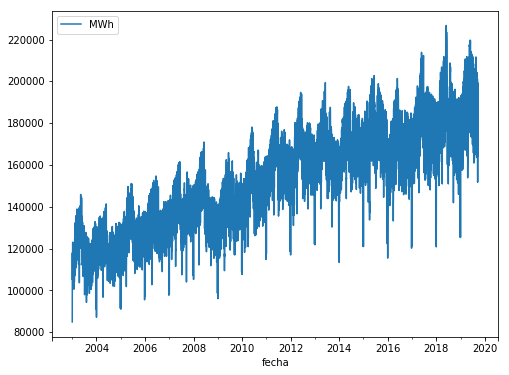

In [2]:
data=pd.read_excel('Consumo.xlsx',index_col='fecha')
data[['MWh']].plot(figsize=(8,6))

### Variable 1: temperatura promedio

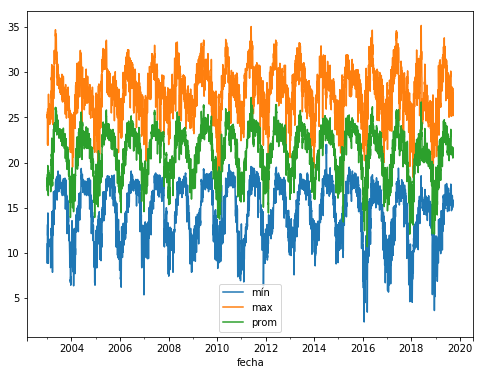

In [3]:
data[['mín','max','prom']].plot(figsize=(8,6))
plt.show()
cambio_prom=np.log(data['prom']/data['prom'].shift()).dropna()

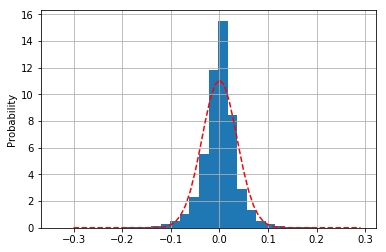

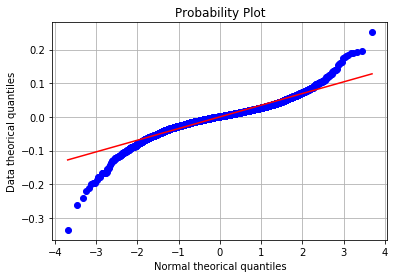

In [4]:
mup = np.mean(cambio_prom); sigmap =np.std(cambio_prom) 
J=30
plt.hist(cambio_prom,bins=J,density=True)
x = np.arange(-.3,.3,.01)
y = st.norm.pdf(x,loc = mup, scale = sigmap)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_prom, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Valor de chi cuadrado librería =  2.779669422953935e+16
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  2.5306803232036102e-05 
Desviación estándar muestral =  0.035935948491634624
Power_divergenceResult(statistic=2.779669422953935e+16, pvalue=0.0)


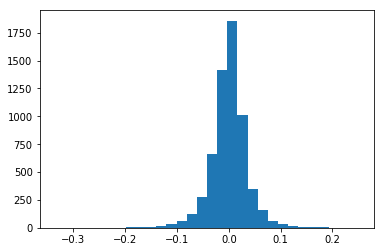

In [5]:
[freq,x,p]=plt.hist(cambio_prom,J,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = st.norm.pdf(x,loc=mup,scale=sigmap)
Ei = n*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mup,'\nDesviación estándar muestral = ',sigmap)
print(X2)
# se rechaza normalidad

In [6]:
from scipy import stats
dist_continu = [d for d in dir(stats) if isinstance(getattr(stats,d), stats.rv_continuous)]
del dist_continu[58]

In [7]:
def get_best_distribution(data):
    dist_names = dist_continu
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]
print(get_best_distribution(cambio_prom))

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:589: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_dist

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.05551496826518.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0358666350088925.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0485389779412628.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1.0917341734457189.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the 

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.360475036378135.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.942572734488916.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.211048162669612.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 7.8406767059272156.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the e

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 55.638068436622596.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 51.50796236692149.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 55.68062727415831.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 58.19273798600756.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the e

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 56.85464840617857.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 56.854908447944126.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 56.85484103370344.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 56.854757429334185.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the 

Best fitting distribution: johnsonsu
Best p value: 0.14976867303388747
Parameters for the best fit: (0.12840449323105604, 1.1552061290059488, 0.004467607521866942, 0.02764671020099998)
('johnsonsu', 0.14976867303388747, (0.12840449323105604, 1.1552061290059488, 0.004467607521866942, 0.02764671020099998))


C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


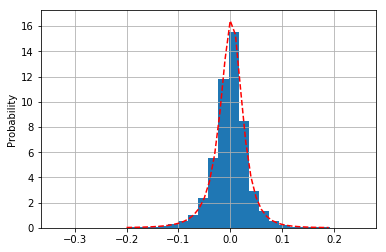

In [9]:
plt.hist(cambio_prom,bins=30,density=True)
x = np.arange(-.2,.2,.01)
y = st.johnsonsu.pdf(x, 0.12840449323105604, 1.1552061290059488, 0.004467607521866942, 0.02764671020099998)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

### Variable 2: Nubosidad

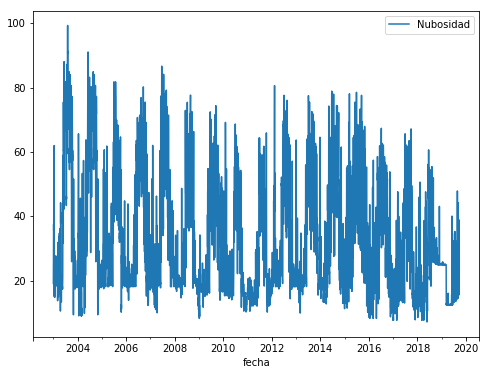

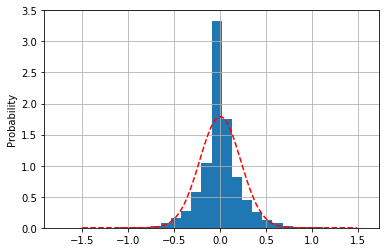

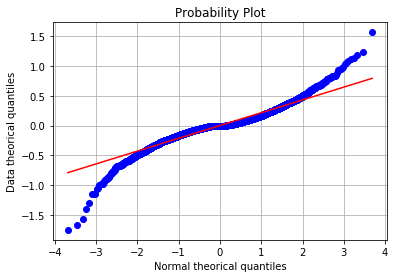

In [10]:
cambio_nubosidad=np.log(data['Nubosidad']/data['Nubosidad'].shift()).dropna()
data[['Nubosidad']].plot(figsize=(8,6))
plt.show()

mun = np.mean(cambio_nubosidad); sigman =np.std(cambio_nubosidad)   

plt.hist(cambio_nubosidad,bins=30,density=True)
x = np.arange(-1.5,1.5,.01)
y = st.norm.pdf(x,loc = mun, scale = sigman)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_nubosidad, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Valor de chi cuadrado librería =  1755176097531.0105
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  -3.269650896779689e-05 
Desviación estándar muestral =  0.22297084395330846
Power_divergenceResult(statistic=1755176097531.0105, pvalue=0.0)


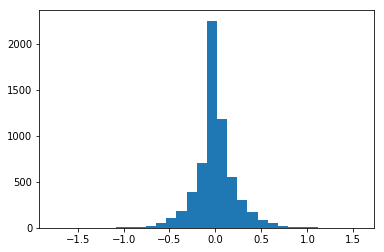

In [11]:
[freq,x,p]=plt.hist(cambio_nubosidad,J,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = st.norm.pdf(x,loc=mun,scale=sigman)
Ei = n*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mun,'\nDesviación estándar muestral = ',sigman)
print(X2)
# se rechaza normalidad

In [12]:
print(get_best_distribution(cambio_nubosidad))

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6532: RuntimeWarning: divide by zero encountered in double_scalars
  return chi**3 / (_norm_pdf_C * _argus_phi(chi)) * x * np.sqrt(y) * np.exp(-chi**2 * y / 2)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, Run

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 281.76300847600055.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 281.1576709550261.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 286.0480691568406.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 289.2339826931229.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the e

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 366.6124297138847.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 369.21735021605855.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 374.78234674540397.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 363.4154940062765.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the 

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 479.4228643043167.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 482.6991095020999.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 486.4637821984045.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 487.16706457178884.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the e

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 591.4163226041799.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 583.1107723346623.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 580.7849354061668.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 588.8952577061398.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the er

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 690.9042512825665.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 700.1720075284675.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 699.2263127116023.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 680.8988583754485.
  RuntimeWarning)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the er

C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:44: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1615: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))
C:\Users\Diana\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3785: RuntimeWarning: divide by zero encountered in true_d

Best fitting distribution: norminvgauss
Best p value: 5.388747859353855e-20
Parameters for the best fit: (0.20841710376007305, 0.003038294678110673, -0.0016110185051247442, 0.10881262375676556)
('norminvgauss', 5.388747859353855e-20, (0.20841710376007305, 0.003038294678110673, -0.0016110185051247442, 0.10881262375676556))


C:\Users\Diana\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


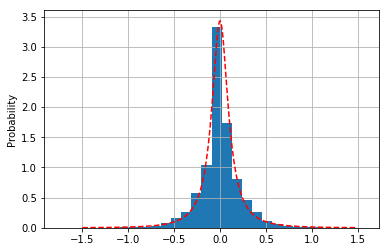

In [13]:
plt.hist(cambio_nubosidad,bins=30,density=True)
x = np.arange(-1.5,1.5,.01)
y = st.norminvgauss.pdf(x, 0.20841710376007305, 0.003038294678110673, -0.0016110185051247442, 0.10881262375676556)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

### Variable 3: Velocidad del viento

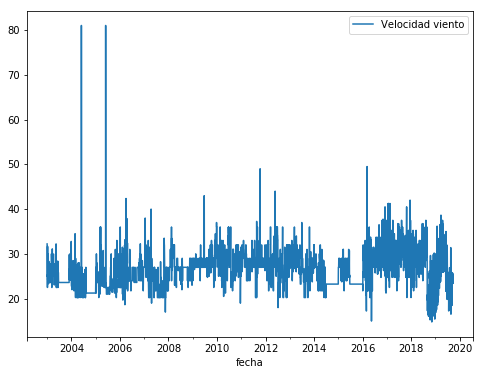

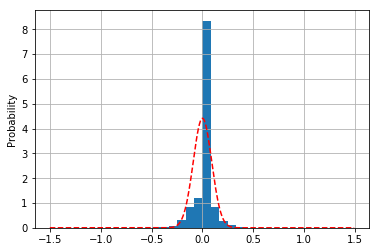

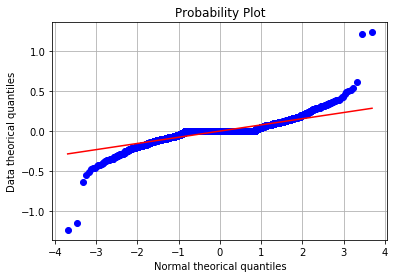

In [14]:
cambio_velocidad=np.log(data['Velocidad viento']/data['Velocidad viento'].shift()).dropna()
data[['Velocidad viento']].plot(figsize=(8,6))
plt.show()

muv = np.mean(cambio_velocidad); sigmav =np.std(cambio_velocidad)

plt.hist(cambio_velocidad,bins=30,density=True)
x = np.arange(-1.5,1.5,.01)
y = st.norm.pdf(x,loc = muv, scale = sigmav)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_velocidad, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Valor de chi cuadrado librería =  1.5460896194657363e+39
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  -5.200520774658307e-05 
Desviación estándar muestral =  0.0903732773654739
Power_divergenceResult(statistic=1.5460896194657363e+39, pvalue=0.0)


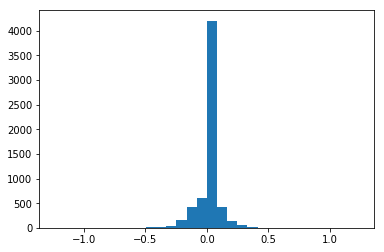

In [15]:
[freq,x,p]=plt.hist(cambio_velocidad,J,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = st.norm.pdf(x,loc=muv,scale=sigmav)
Ei = n*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',muv,'\nDesviación estándar muestral = ',sigmav)
print(X2)
# se rechaza normalidad

In [13]:
print(get_best_distribution(cambio_velocidad))

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:312: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6532: RuntimeWarning: divide by zero encountered in double_scalars
  return chi**3 / (_norm_pdf_C * _argus_phi(chi)) * x * np.sqrt(y) * np.exp(-chi**2 * y / 2)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:589: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\Usuario\An

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1321.6787448530958.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1331.9308051346106.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1309.8896743410892.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1320.271183310269.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parame

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1674.6697665564398.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1657.0534905242398.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1662.0392469035596.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 1669.4181410750607.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape param

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2051.4104572708743.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2051.789992427055.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2068.708591351374.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2085.6763354191044.
  RuntimeWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning: The shape paramet

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:44: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3785: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: Extremely bad integrand b

Best fitting distribution: alpha
Best p value: 0.0
Parameters for the best fit: (58.47838543461553, -5.367089830459744, 313.8076667338303)
('alpha', 0.0, (58.47838543461553, -5.367089830459744, 313.8076667338303))


TypeError: 'NoneType' object is not callable

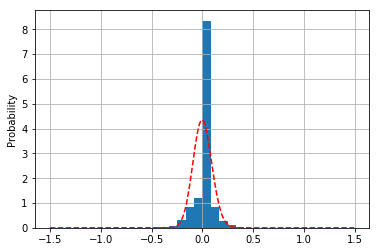

In [16]:
plt.hist(cambio_velocidad,bins=30,density=True)
x = np.arange(-1.5,1.5,.01)
y = st.alpha.pdf(x, 58.47838543461553, -5.367089830459744, 313.8076667338303)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

## Variable 4: Lluvia

C:\Users\Diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


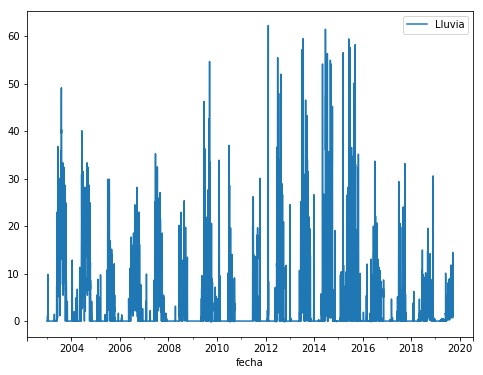

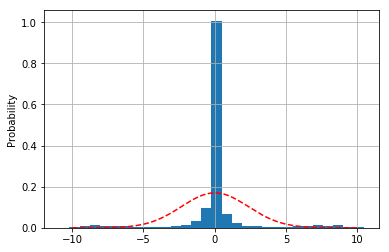

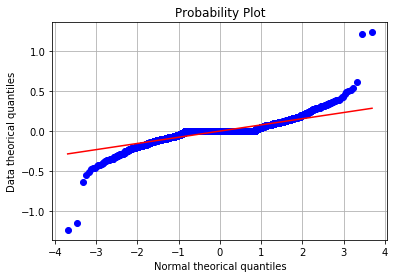

In [17]:
cambio_lluvia=np.log(data['Lluvia']/data['Lluvia'].shift()).dropna()
data[['Lluvia']].plot(figsize=(8,6))
plt.show()

mul = np.mean(cambio_lluvia); sigmal =np.std(cambio_lluvia)

plt.hist(cambio_lluvia,bins=30,density=True)
x = np.arange(-10,10,.01)
y = st.norm.pdf(x,loc = mul, scale = sigmal)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()
grap1 = st.probplot(cambio_velocidad, dist="norm", plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Valor de chi cuadrado librería =  6438536.696114304
Estadístico de chi_cuadrado =  40.113272069413625
Media muestral =  0.00865196656000384 
Desviación estándar muestral =  2.347185434025944
Power_divergenceResult(statistic=6438536.696114304, pvalue=0.0)


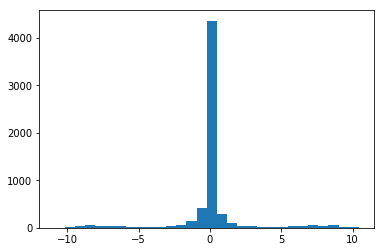

In [18]:
[freq,x,p]=plt.hist(cambio_lluvia,J,density=False)
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 
# Se desea resolver la siguiente prueba de hipótesis
#   H0: la distribución es normal con media= mu y std = sigma
#   Ha: los datos no se distribuyen normales
n  = len(x)
pi = st.norm.pdf(x,loc=mul,scale=sigmal)
Ei = n*pi

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',list(X2)[0])

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est)
print('Media muestral = ',mul,'\nDesviación estándar muestral = ',sigmal)
print(X2)
# se rechaza normalidad

In [ ]:
print(get_best_distribution(cambio_lluvia))

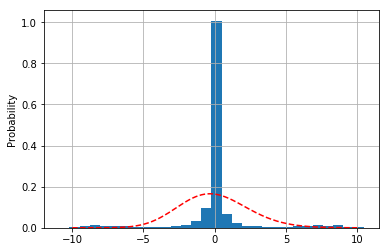

In [19]:
plt.hist(cambio_lluvia,bins=30,density=True)
x = np.arange(-10,10,.01)
y = st.alpha.pdf(x, 22.135457030945275, -53.659348014763026, 1185.1081291183473)
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()